<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from seaborn import heatmap
from ydata_profiling import ProfileReport
from scipy.stats import median_abs_deviation

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
import warnings

# отключение предупреждений
warnings.filterwarnings("ignore")

# 10 случайных строк 
sample = df_train.sample(10)

# первые 5 и последние 5 строки 
df_train_head = df_test.head(5)
df_test_tail = df_test.tail(5)

# пропуски
mis = df_train.isnull().sum()
missing = mis[mis > 0].index.tolist()

# количество дубликатов
duplicates = df_train.duplicated().sum()

# создание мега анализа через ydata-profilling
profile = ProfileReport(df_train, title="Profiling Report", minimal=True)
profile.to_file("profiling_report.html")

print(sample, df_train_head, df_test_tail, missing, duplicates)



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

In [4]:
df_train.sample(10)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6973,Tata Nexon 1.5 Revotorq XT,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2638,Maruti Wagon R VXI,2006,135000,62900,Petrol,Individual,Manual,First Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
4256,Maruti Swift Dzire VDI,2019,675000,25000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
5699,Maruti Swift Dzire ZDI,2018,780000,30000,Diesel,Individual,Manual,First Owner,28.4 kmpl,1248 CC,74.02 bhp,190Nm@ 2000rpm,5.0
2629,Maruti Omni E MPI STD BS IV,2016,190000,80000,Petrol,Individual,Manual,Second Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
5512,Tata Indica V2 LSi,2008,85000,25000,Petrol,Individual,Manual,Second Owner,16.84 kmpl,1193 CC,64.4 bhp,99.8Nm@ 2700rpm,5.0
4885,Tata Nano Twist XE,2015,110000,15000,Petrol,Individual,Manual,First Owner,25.4 kmpl,624 CC,37.5 bhp,51Nm@ 4000+/-500rpm,4.0
1964,Maruti Omni 8 Seater BSII,2010,130000,120000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,8.0
2343,Ford EcoSport 1.5 Ti VCT AT Titanium BSIV,2015,775000,30000,Petrol,Individual,Automatic,First Owner,15.63 kmpl,1499 CC,110.4 bhp,140Nm@ 4400rpm,5.0
5179,Mahindra TUV 300 T8,2017,700000,40000,Diesel,Individual,Manual,First Owner,18.49 kmpl,1493 CC,100 bhp,240Nm@ 1600-2800rpm,7.0


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [5]:
# рассчитываем медианы по треину
medians = df_train.median(numeric_only=True)

# заполняем пропуски в числовых столбцах 
df_train.fillna(value=medians, inplace=True)
df_test.fillna(value=medians, inplace=True)

# проверяем остались ли пропуски
train_check = df_train.isnull().sum().sum()
test_check = df_test.isnull().sum().sum()
colum_isnull = df_train.isnull().sum()

print(train_check, test_check, colum_isnull)


803 76 name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats              0
dtype: int64


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [6]:
# считаем сколько дубликатов
duplicates = df_train.duplicated(subset=df_train.columns.difference(['selling_price']), keep=False)
num_duplicates = duplicates.sum()
# удаляем дубликаты по всем признакам, кроме целевой переменной
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')

# ресет индексов
df_train.reset_index(drop=True, inplace=True)


print(num_duplicates, df_train.shape)

1799 (5840, 13)


In [7]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [8]:
# преобразование данных в числовой вид
def extract_numeric(value):
    try:
        return float(''.join(c for c in str(value) if c.isdigit() or c == '.'))
    except ValueError:
        return None

# преобразуем столбцы mileage, engine, max_power
for column in ['mileage', 'engine', 'max_power']:
    df_train[column] = df_train[column].apply(extract_numeric).astype(float)
    df_test[column] = df_test[column].apply(extract_numeric).astype(float)

# удаляем столбец torque
if 'torque' in df_train.columns:
    df_train.drop(columns=['torque'], inplace=True)
if 'torque' in df_test.columns:
    df_test.drop(columns=['torque'], inplace=True)

# проверка на типы данных
print(df_train.dtypes, df_test.dtypes)
print(df_train.isnull().sum(), df_test.isnull().sum())



name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        184
seats              0
dtype: int64 name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_

In [9]:
# оставшиеся столбцы, которые нужно заполнить
cols = ['mileage', 'engine', 'max_power']

# вычисляем медианы  (на трейне)
medians = df_train[cols].median()

# заполняем пропуски
df_train[cols] = df_train[cols].fillna(medians)
df_test[cols] = df_test[cols].fillna(medians)

print(df_train.isnull().sum(), df_test.isnull().sum())
 



name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [10]:
# преобразуем в int
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# проверка
a = df_train.dtypes
b = df_test.dtypes
print(a, b)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [11]:
# считаем основные статистики по числовым
numm_train = df_train.describe() 
numm_test = df_test.describe()    
# считаем основные статистики по категориальным
catt_train = df_train.describe(include=['object'])  
catt_test = df_test.describe(include=['object']) 

print(numm_train, numm_test, catt_train, catt_test)

              year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000   

In [12]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [ ]:
# проверка записей с нулевой мощностью
df_train[df_train['max_power'] == 0]
# Заполнение нулевых значений в max_power медианой
median_power = df_train['max_power'].median()
df_train.loc[df_train['max_power'] == 0, 'max_power'] = median_power


df_train[df_train['max_power'] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


In [14]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

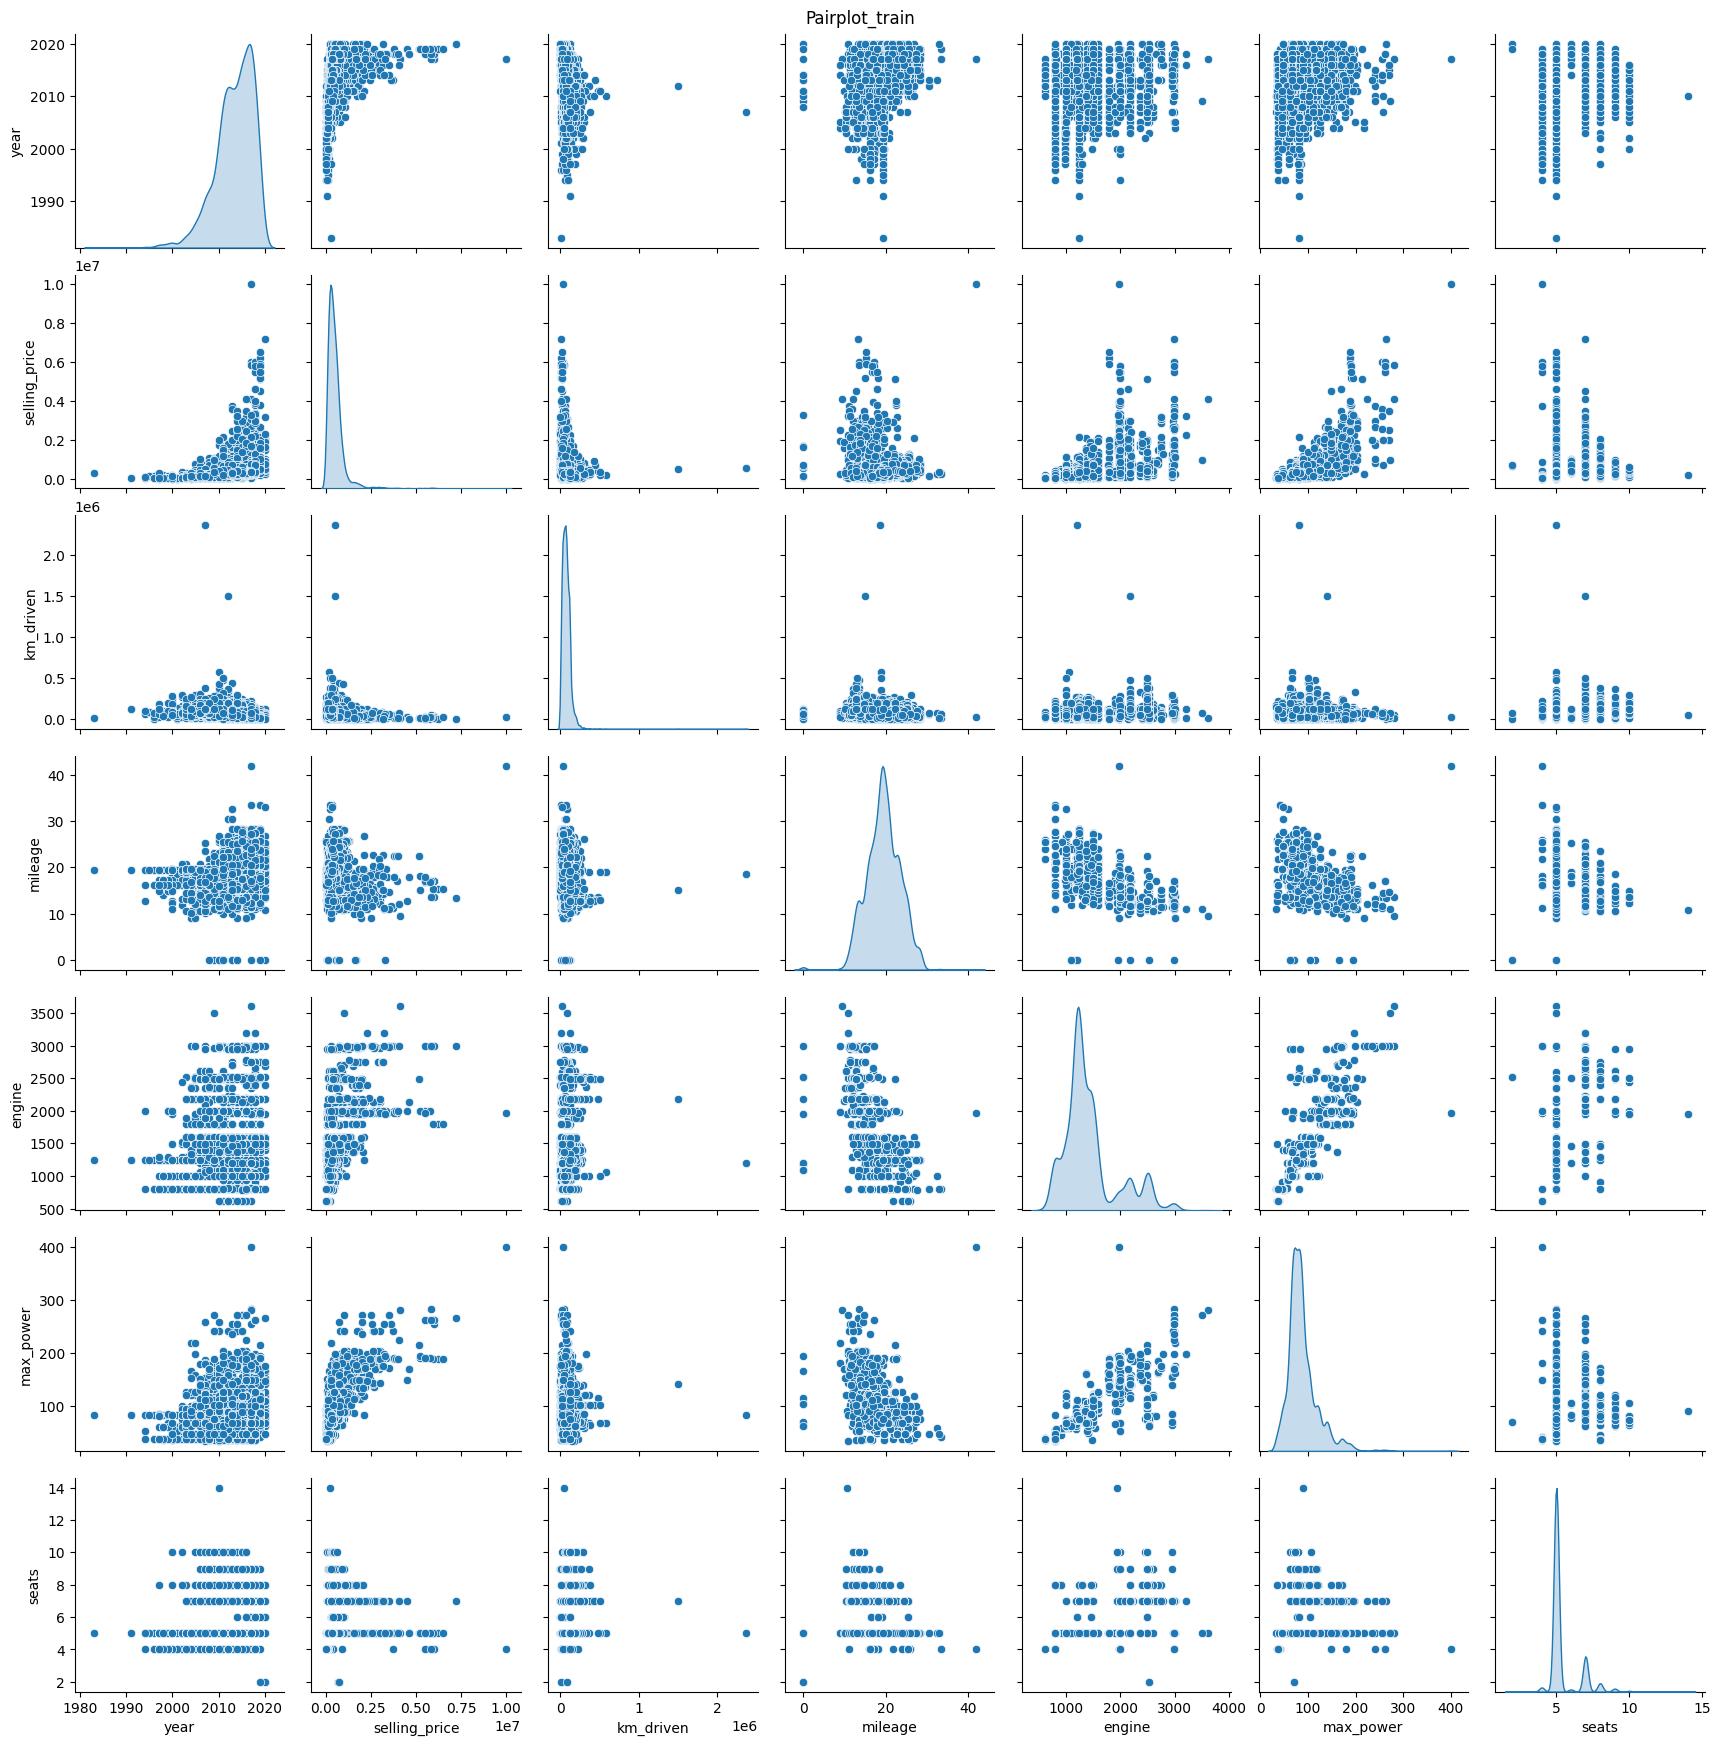

In [47]:
%matplotlib inline

numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_train[numerical_columns], diag_kind='kde')
plt.suptitle("Pairplot_train", y=1)
plt.show()

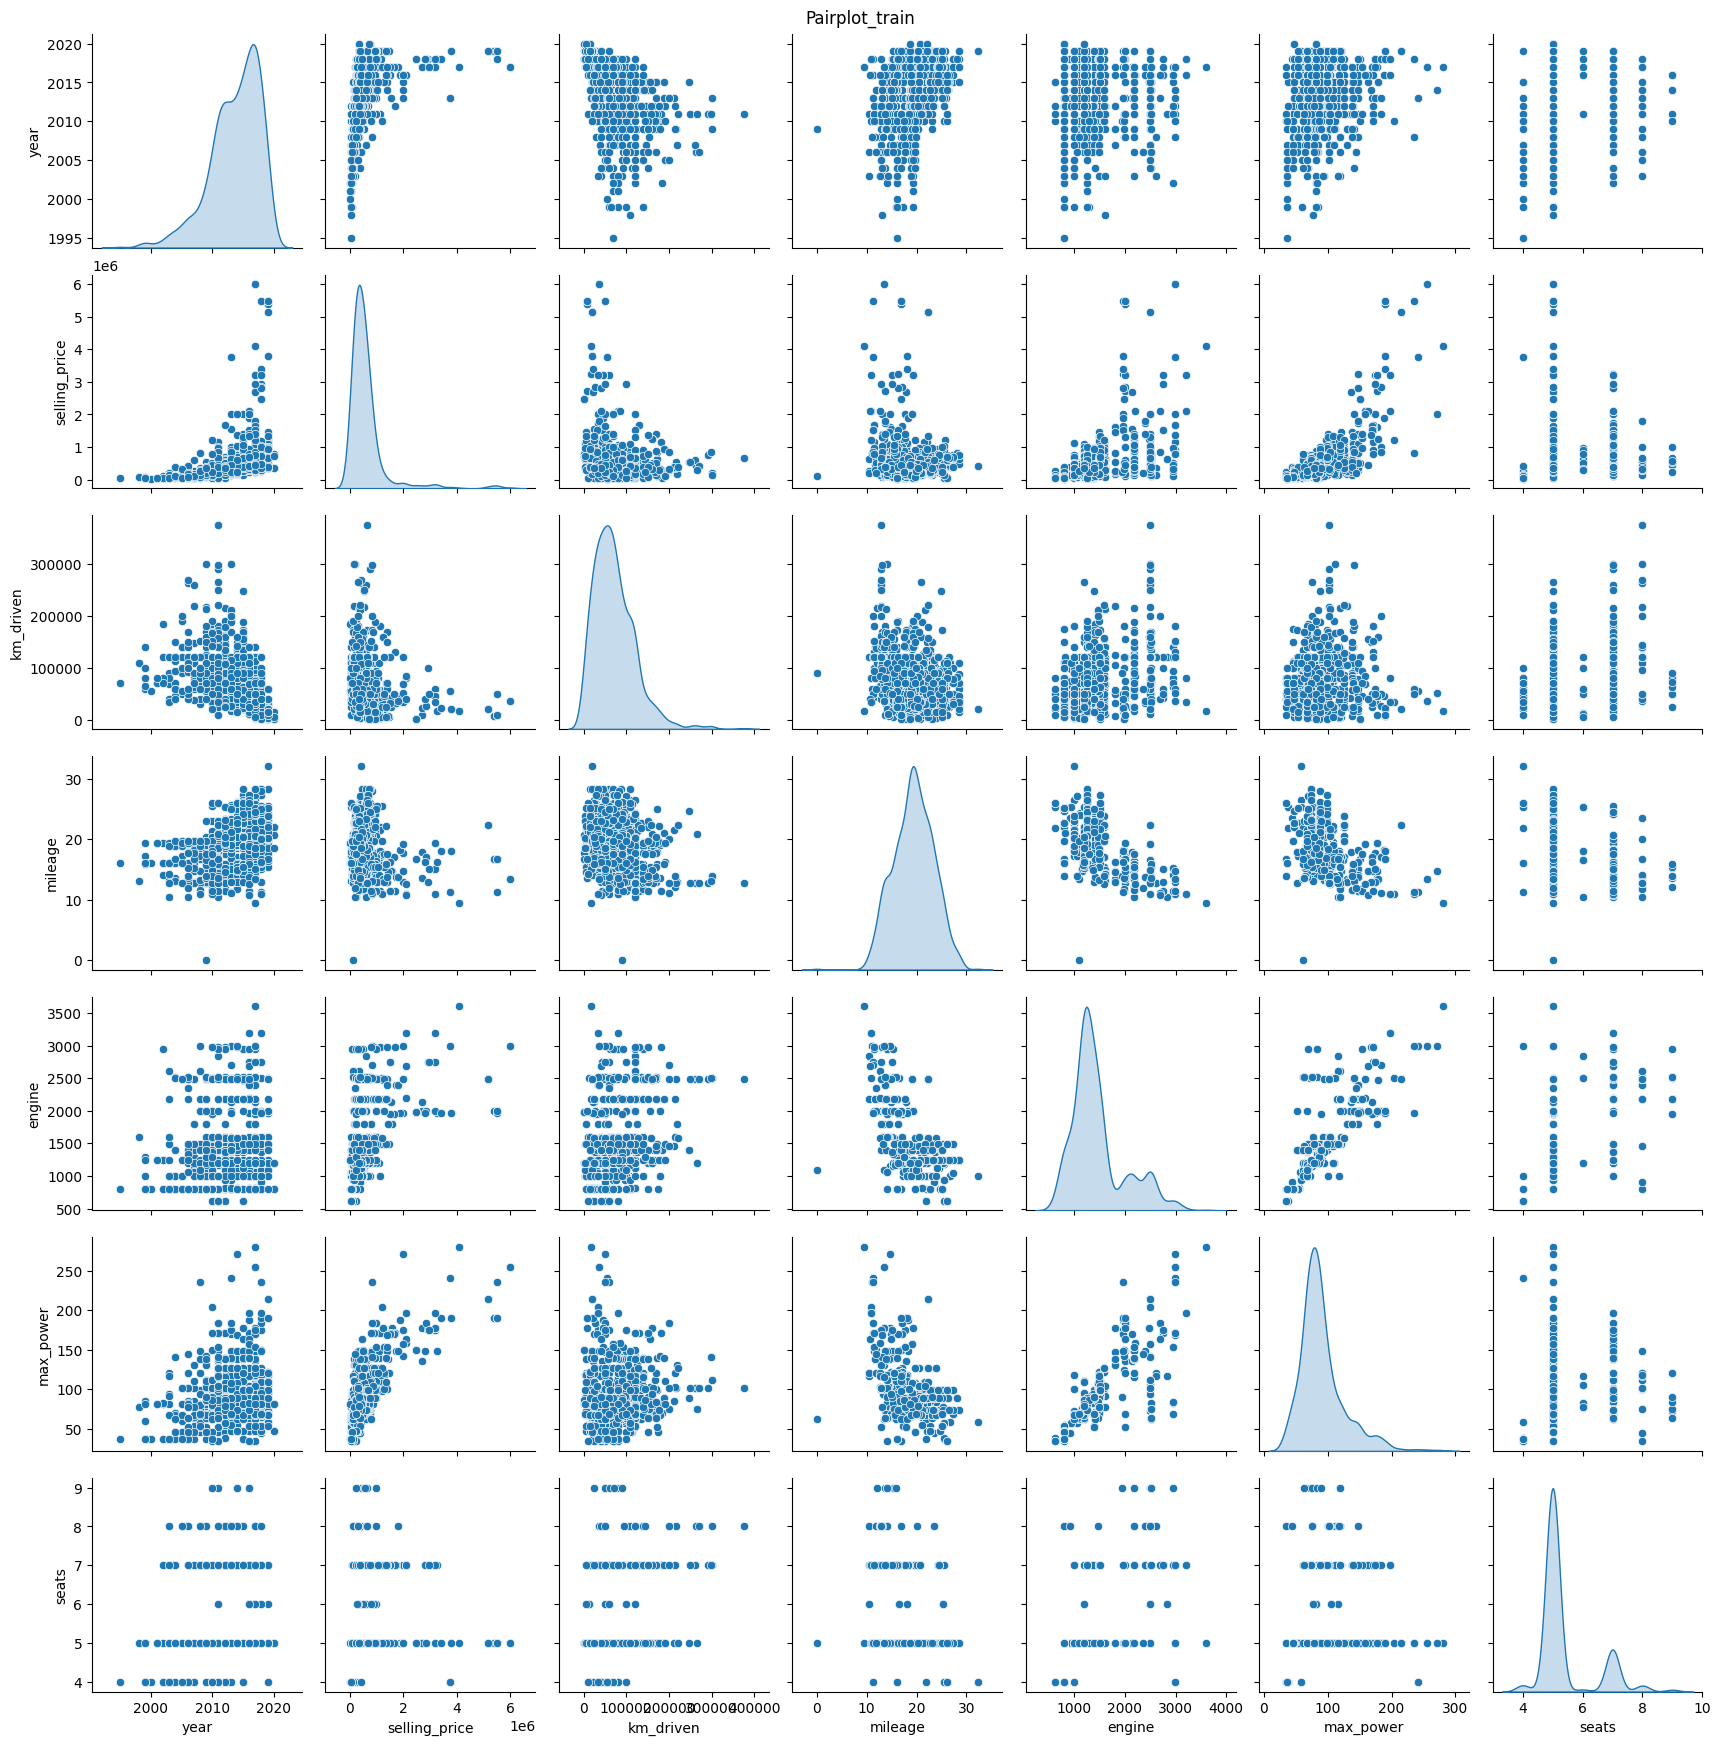

In [16]:
%matplotlib inline

numerical_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

sns.pairplot(df_test[numerical_columns], diag_kind='kde')
plt.suptitle("Pairplot_train", y=1)
plt.show()

### Анализ зависимости признаков и целевой переменной

- **Можно ли предположить на основе распределений связь признаков с целевой переменной?**  
  Проанализировав графики, можно сделать вывод, что признаки, такие как `year`, `engine` и `max_power`, имеют зависимость с `selling_price`. Поэтому можно выдвинуть гипотезу о наличии корреляции между этими признаками

---

### Анализ гипотезы о корреляциях признаков

- **Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**  
  Да, распределения указывают на наличие зависимости между ключевыми признаками (`year`, `engine`, `max_power`) и целевой переменной (`selling_price`). Это позволяет выдвинуть гипотезу о значимых корреляциях между этими данными

---

### Сравнение совокупностей при разделении на трейн и тест

- **Похожими ли оказались совокупности при разделении на трейн и тест?**  
  Сравнив визуализацию распределений данных в `df_train` и `df_test`, можно сделать вывод, что они выглядят согласованными, а значит похожи


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


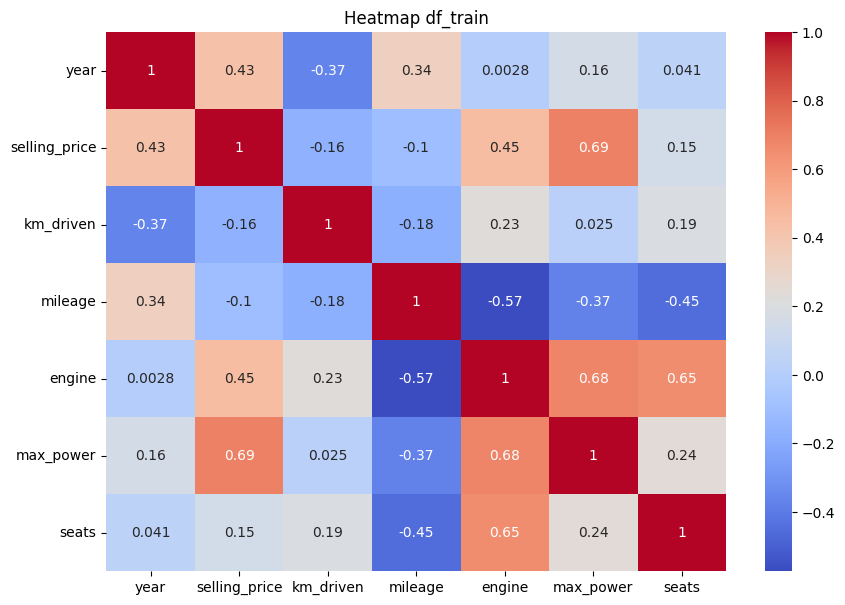

In [17]:
cor_matrix = df_train[numerical_columns].corr(method='pearson')
cor_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap df_train")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

### Анализ корреляции между признаками

- **Какие 2 признака наименее скоррелированы между собой?**  
  Наименьшая корреляция наблюдается между `seats` и `year`, с коэффициентом корреляции 0.0028. Это указывает на практически полное отсутствие взаимосвязи между этими признаками

---

### Сильная положительная линейная зависимость

- **Между какими признаками наблюдается довольно сильная положительная линейная зависимость?**  
  Наиболее сильная положительная линейная зависимость наблюдается между `selling_price` и `max_power`

---

### Связь между годом выпуска и пробегом

- **Правильно ли утверждать, что чем меньше год, тем больше километров проехала машина к дате продажи?**  
  Коэффициент корреляции между `year` и `km_driven` равен -0.37. 
  Это указывает на умеренно-слабую отрицательную корреляцию, подтверждающую гипотезу: чем меньше год, тем больше километров проехала машина



`Your answer here`

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

### Уже по построенным графикам уже можно сделать ключевые выводы:
#### Ключевые выводы из графиков и анализа данных
#### Основные зависимости:
- **Сильная положительная корреляция:**
  - Признаки `engine` и `max_power` демонстрируют сильную положительную корреляцию
    Это ожидаемо, так как мощность двигателя и его объем связаны напрямую

- **Умеренная положительная корреляция:**
  - Признаки `selling_price`, `engine` и `max_power` имеют умеренную положительную корреляцию 
    Машины с более мощными двигателями и большей мощностью стоят дороже

- **Умеренная отрицательная корреляция:**
  - Между `mileage` и `selling_price` наблюдается умеренная отрицательная корреляция 
    Автомобили с большим пробегом, как правило, дешевле

---
#### Выводы:
- Для модели признаки `engine` и `max_power` можно рассматривать как важные для предсказания `selling_price`
- Мощные двигатели оказывают значительное влияние на цену автомобиля
- Меньший пробег положительно коррелирует с более высокой стоимостью автомобиля


In [18]:
# метод MAD выявление выбросов в числовых признаках
def detect_outliers_mad(df, columns, threshold=3.5):
    outliers = {}
    for column in columns:
        median = df[column].median()
        mad = median_abs_deviation(df[column].dropna())
        
        df['mad_score'] = np.abs((df[column] - median) / mad)
        
        outliers[column] = df[df['mad_score'] > threshold]

        df.drop(columns='mad_score', inplace=True)
    
    return outliers

numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
outliers_detected = detect_outliers_mad(df_train, numerical_columns)

# проверим количество выбросов для каждого столбца
outliers_count = {col: len(outliers_detected[col]) for col in outliers_detected}

outliers_count


{'year': 126,
 'selling_price': 376,
 'km_driven': 195,
 'mileage': 30,
 'engine': 916,
 'max_power': 529,
 'seats': 1222}

Можно рассчитать и удалить выбросы из датафрейма, чтобы уменьшить размерность и улучшить качество модели. Но это уже совсем другая история

Поэтому пока работаю с текущими данными

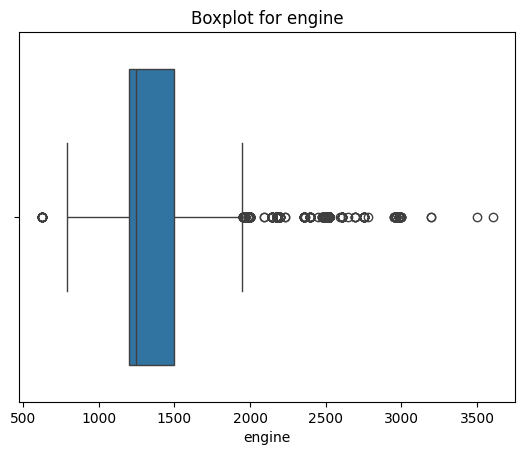

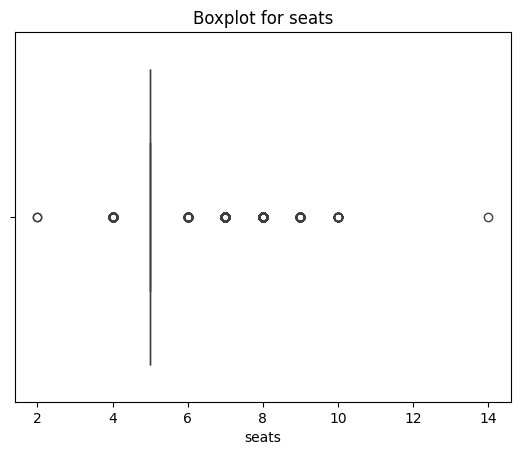

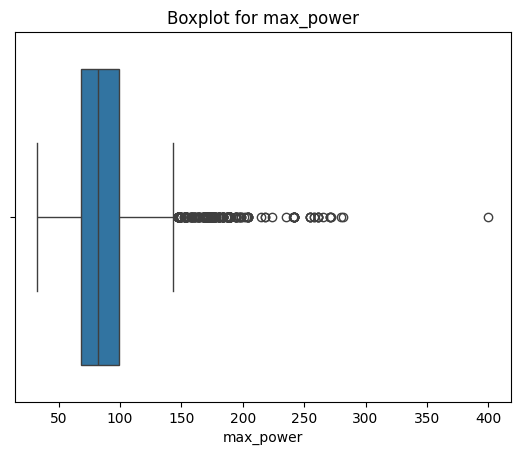

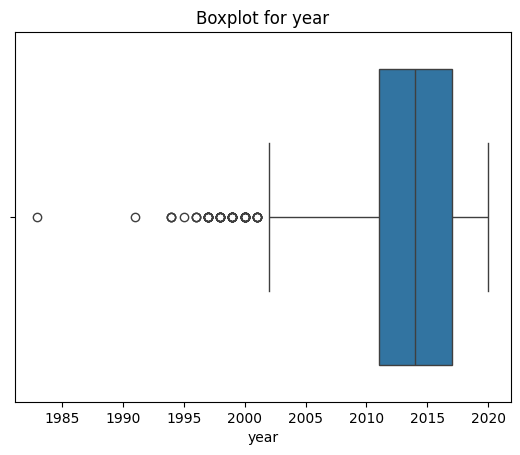

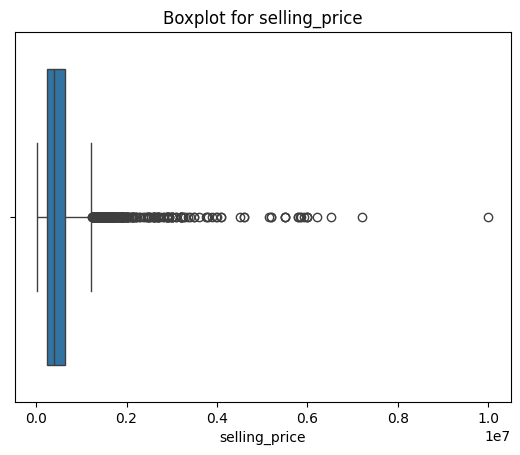

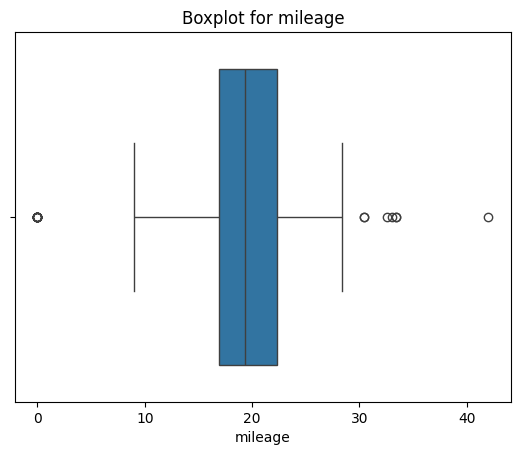

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# строим графики выбросов для числовых признаков
for col in ['engine', 'seats', 'max_power', 'year', 'selling_price', 'mileage']:
    sns.boxplot(data=df_train, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


In [20]:
# Q1 = numerical_columns.quantile(0.25)
# Q3 = numerical_columns.quantile(0.75)
# IQR = Q3 - Q1

# df = df_train[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]
# df = df_test[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# print(df_train.describe(), df_test.describe)



# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [21]:

# удаляем все категориальные столбцы, кроме seats
y_train = df_train['selling_price']
X_train = df_train.select_dtypes(include=['float64', 'int64']).copy()

y_test = df_test['selling_price']
X_test = df_test.select_dtypes(include=['float64', 'int64']).copy()

# удаляем selling_price из X_train и X_test
X_train = X_train.drop(columns=['selling_price'], errors='ignore')
X_test = X_test.drop(columns=['selling_price'], errors='ignore')

print(X_train.info(), X_test.info(), y_train.shape, y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5840 non-null   int64  
 1   km_driven  5840 non-null   int64  
 2   mileage    5840 non-null   float64
 3   engine     5840 non-null   int64  
 4   max_power  5840 non-null   float64
 5   seats      5840 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 273.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1000 non-null   int64  
 1   km_driven  1000 non-null   int64  
 2   mileage    1000 non-null   float64
 3   engine     1000 non-null   int64  
 4   max_power  1000 non-null   float64
 5   seats      1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB
None None (5840,) (1000,)


In [22]:
assert X_train.shape == (5840, 6)

In [23]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

print('r2', r2_score(y_test, model.predict(X_test)))
print('mse', MSE(y_test, model.predict(X_test)))



r2 0.5946576472666452
mse 233002359160.8032


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_standarted = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_standarted = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

model.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, model.predict(X_test_standarted)))
print('mse', MSE(y_test, model.predict(X_test_standarted)))

r2 0.5946576472666552
mse 233002359160.7975


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [26]:
print(model.coef_)
print(f"Наиболее информативным в предсказании цены оказался признак: {X_train.columns[np.where(model.coef_ == max([abs(i) for i in model.coef_]))][0]}")

[152247.33086876 -44066.18021284  29319.18102634  59324.98036527
 324496.85782122 -22159.18786684]
Наиболее информативным в предсказании цены оказался признак: max_power


Наиболее информативный признак: max_power,
его коэффициент  имеет наибольший модуль, что говорит о его значительной роли в предсказании цены автомобиля

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [27]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()

model_l1.fit(X_train_standarted, y_train)

print('r2', r2_score(y_test, model_l1.predict(X_test_standarted)))
print('mse', MSE(y_test, model_l1.predict(X_test_standarted)))
print('Коэффициенты:', model_l1.coef_)

r2 0.5946564811772821
mse 233003029462.26755
Коэффициенты: [152247.14742736 -44065.05085353  29317.30055383  59320.137094
 324497.75189092 -22156.30524519]


- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.


    Возможно из-за того что альфа по умолчанию равен 1

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [28]:
%%time
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {"alpha": [i for i in range(500, 2000, 100)]}

lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

lasso_regressor.fit(X_train_standarted, y_train)

score1 = len(parameters['alpha']) * lasso_regressor.get_params()['cv']

print('r2_test', r2_score(y_test, lasso_regressor.predict(X_test_standarted)))
print('r2_train', r2_score(y_train, lasso_regressor.predict(X_train_standarted)),'\n')


print('mse_test', MSE(y_test, lasso_regressor.predict(X_test_standarted)))
print('mse_train', MSE(y_train, lasso_regressor.predict(X_train_standarted)))

print('best_params', lasso_regressor.best_params_ )

print(f"Грид-сёрчу пришлось обучать {score1} моделей")


r2_test 0.5933580367503934
r2_train 0.5931681671142655 

mse_test 233749412396.75272
mse_train 116613600569.46031
best_params {'alpha': 1100}
Грид-сёрчу пришлось обучать 150 моделей
CPU times: total: 125 ms
Wall time: 251 ms


In [29]:
%%time
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {"alpha": [i for i in range(1, 2000, 1220)]}

lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

lasso_regressor.fit(X_train_standarted, y_train)

score2 = len(parameters['alpha']) * lasso_regressor.get_params()['cv']

print('r2_test', r2_score(y_test, lasso_regressor.predict(X_test_standarted)))
print('r2_train', r2_score(y_train, lasso_regressor.predict(X_train_standarted)),'\n')
print('mse_test', MSE(y_test, lasso_regressor.predict(X_test_standarted)))
print('mse_train', MSE(y_train, lasso_regressor.predict(X_train_standarted)))

print('best_params', lasso_regressor.best_params_ )

print(f"Грид-сёрчу пришлось обучать {score2} моделей")

r2_test 0.5932124368652008
r2_train 0.5931584729655464 

mse_test 233833107368.45914
mse_train 116616379284.14096
best_params {'alpha': 1221}
Грид-сёрчу пришлось обучать 20 моделей
CPU times: total: 31.2 ms
Wall time: 40.7 ms


In [30]:
%%time
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

parameters = {"alpha": [i for i in range(506, 1250, 3333)]}

lasso_regressor = GridSearchCV(lasso,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

lasso_regressor.fit(X_train_standarted, y_train)

score3 = len(parameters['alpha']) * lasso_regressor.get_params()['cv']


print('r2_test', r2_score(y_test, lasso_regressor.predict(X_test_standarted)))
print('r2_train', r2_score(y_train, lasso_regressor.predict(X_train_standarted)),'\n')


print('mse_test', MSE(y_test, lasso_regressor.predict(X_test_standarted)))
print('mse_train', MSE(y_train, lasso_regressor.predict(X_train_standarted)))

print('best_params', lasso_regressor.best_params_ )

print(f"Грид-сёрчу пришлось обучать {score3} моделей")

r2_test 0.5940653519598107
r2_train 0.5932010464312698 

mse_test 233342827416.54224
mse_train 116604176096.66785
best_params {'alpha': 506}
Грид-сёрчу пришлось обучать 10 моделей
CPU times: total: 15.6 ms
Wall time: 22.4 ms


In [31]:
print(lasso_regressor.best_params_ , lasso_regressor.best_estimator_.coef_)
print(score3 + score2 + score1)

{'alpha': 506} [152126.13526477 -43510.70499074  28412.21201715  56933.90740924
 324935.04500074 -20711.66069888]
180


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [45]:
%%time
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {"max_iter": [-3, 6, 100],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}

elastic_regressor = GridSearchCV(elastic,
                               parameters,
                               scoring = 'neg_mean_squared_error',
                               cv = 10)

elastic_regressor.fit(X_train_standarted, y_train)

lasso_coefs = elastic_regressor.best_estimator_.coef_ == 0
print('r2_test', r2_score(y_test, elastic_regressor.predict(X_test_standarted)))
print('r2_train', r2_score(y_train, elastic_regressor.predict(X_train_standarted)),'\n')
print(f"Грид-сёрчу пришлось обучать {len(parameters['alpha']) * lasso_regressor.get_params()['cv']} моделей")
print('best_params', lasso_regressor.best_params_ )
print('mse_test', MSE(y_test, elastic_regressor.predict(X_test_standarted)))
print('mse_train', MSE(y_train, elastic_regressor.predict(X_train_standarted)))
print("Зануленные признаки:", lasso_coefs.sum())

r2_test 0.5924660913050379
r2_train 0.593154683361061 

Грид-сёрчу пришлось обучать 70 моделей
best_params {'alpha': 506}
mse_test 234262128108.81476
mse_train 116617465530.07367
Зануленные признаки: 0
CPU times: total: 1.94 s
Wall time: 2.96 s


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [33]:

df_train = df_train.drop(columns=['name'],errors='ignore')
df_test = df_test.drop(columns=['name'],errors='ignore')

train_columns = df_train.columns
test_columns = df_test.columns

print(train_columns)
print(test_columns)


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')
Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [ ]:
#assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [ ]:
#X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [35]:

cat_features = df_train.select_dtypes(include=['object']).columns.tolist()

In [36]:

X_train_cat = df_train[cat_features].copy()
X_test_cat = df_test[cat_features].copy()

In [37]:
cat_columns = X_train_cat.columns[(X_train_cat.dtypes == "object").values].to_list() + ['seats']

In [38]:
from sklearn.preprocessing import OneHotEncoder

# создаем кат-ные признаки
cat_features = df_train.select_dtypes(include=['object']).columns.tolist()

# выделяем кат-ные данные
X_train_cat = df_train[cat_features].copy()
X_test_cat = df_test[cat_features].copy()

# добавляем seats
X_train_cat['seats'] = df_train['seats']
X_test_cat['seats'] = df_test['seats']

# Создаём ОНЕ
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Кодируем треин
encoded_train = encoder.fit_transform(X_train_cat)

# кодируем тест
encoded_test = encoder.transform(X_test_cat)

# создаем фрейм из закодированныч данных
encoded_columns = encoder.get_feature_names_out(X_train_cat.columns)
encoded_train_df = pd.DataFrame(encoded_train, columns=encoded_columns, index=df_train.index)
encoded_test_df = pd.DataFrame(encoded_test, columns=encoded_columns, index=df_test.index)

# числовые признаки
num_features_train = df_train.select_dtypes(include=['int64', 'float64']).drop(columns=['selling_price'])
num_features_test = df_test.select_dtypes(include=['int64', 'float64']).drop(columns=['selling_price'])

# объединяем число и категории
df_train_enc = pd.concat([num_features_train, encoded_train_df], axis=1)
df_test_enc = pd.concat([num_features_test, encoded_test_df], axis=1)


df_train_enc.head(), df_test_enc.head()

(   year  km_driven  mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  \
 0  2014     145500    23.40    1248      74.00      5          1.0       0.0   
 1  2014     120000    21.14    1498     103.52      5          1.0       0.0   
 2  2010     127000    23.00    1396      90.00      5          1.0       0.0   
 3  2007     120000    16.10    1298      88.20      5          0.0       0.0   
 4  2017      45000    20.14    1197      81.86      5          0.0       0.0   
 
    fuel_Petrol  seller_type_Individual  ...  owner_Test Drive Car  \
 0          0.0                     1.0  ...                   0.0   
 1          0.0                     1.0  ...                   0.0   
 2          0.0                     1.0  ...                   0.0   
 3          1.0                     1.0  ...                   0.0   
 4          1.0                     1.0  ...                   0.0   
 
    owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
 0         

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [39]:
assert df_train_enc.columns.equals(df_test_enc.columns)
assert df_train_enc.isna().sum().sum() == 0
assert df_test_enc.isna().sum().sum() == 0
assert df_train_enc.shape[0] == y_train.shape[0]
assert df_test_enc.shape[0] == y_test.shape[0]

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200, 500]}
ridge_model = Ridge(random_state=42)
ridge_regressor = GridSearchCV(
    estimator=ridge_model,
    param_grid=ridge_params,
    scoring='r2',
    cv=10,
    n_jobs=-1
)


ridge_regressor.fit(df_train_enc, y_train)
best_alpha_ridge = ridge_regressor.best_params_['alpha']
best_r2_ridge = ridge_regressor.best_score_
y_test_pred = ridge_regressor.best_estimator_.predict(df_test_enc)
test_r2_ridge = r2_score(y_test, y_test_pred)

print(f"best_alpha_ridge: {best_alpha_ridge}")
print(f"best_r2_ridge: {best_r2_ridge}")
print(f"test_r2_ridge: {test_r2_ridge}")

best_alpha_ridge: 10
best_r2_ridge: 0.6224448508444136
test_r2_ridge: 0.6459039521665383


In [43]:
print(f'После добавления кат. признаков, метрика r2 увеличилась ~ на {round(r2_score(y_test, ridge_regressor.predict(df_test_enc)) - r2_score(y_test, elastic_regressor.predict(X_test_standarted)), 4)}')

После добавления кат. признаков, метрика r2 увеличилась ~ на 0.0534


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [ ]:
def business_metrics(y_true, y_pred):
    return ((abs((ypred - y_true) / y_true)) <= 0.1).sum() / len(y_true)

ypred = ridge_regressor.predict(df_test_enc)
print(f"Бизнес метрика - {business_metrics(np.array(y_test), ypred)}")

Бизнес метрика - 0.245


In [41]:
for coef, feature_name in sorted(zip(ridge_regressor.best_estimator_.coef_, df_test_enc.columns)):
    print(coef, feature_name)

-288211.53238617163 transmission_Manual
-179630.88886638638 seats_6
-172212.2187591651 seats_5
-109860.05097886208 seller_type_Individual
-96289.78833245338 seller_type_Trustmark Dealer
-79749.9178276477 seats_7
-52691.0371308876 owner_Second Owner
-43266.68143795428 seats
-36579.28031171283 owner_Fourth & Above Owner
-36238.608284164744 fuel_Petrol
-35813.184039697815 owner_Third Owner
-0.502927846430238 km_driven
80.0854112885513 engine
3354.62768090547 seats_8
5502.909692616006 seats_14
8430.5064277231 mileage
9173.897704307974 max_power
17611.022651005453 fuel_Diesel
36146.58569938044 year
36326.70916233952 seats_9
72055.11069975626 seats_10
116388.55554979685 fuel_LPG
336876.2936561181 seats_4
935576.6884819588 owner_Test Drive Car


`Your answer here`

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List
from fastapi import FastAPI, UploadFile, HTTPException

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


class CarPricePredictorPreprocessor:
    def __init__(self):
        self.model = Ridge(alpha=10)
        self.ohe = OneHotEncoder(drop='first', sparse=False)
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy="median")
        self._fit_example_data()

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

